# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [218]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime as dt
from scipy.stats import linregress
%matplotlib inline

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [219]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 44


---

In [220]:
print(cities)


['edinburgh of the seven seas', 'ribeira grande', 'thompson', 'invercargill', 'yenangyaung', 'tura', 'puerto natales', 'tazovsky', 'wailua homesteads', 'udachny', 'tralee', 'port elizabeth', 'imbituba', 'hassi messaoud', 'tiksi', 'taiohae', 'yellowknife', 'lebu', 'otjimbingwe', 'klyuchi', 'kerikeri', 'east london', 'port-aux-francais', 'tolanaro', 'college', 'papatowai', 'sisimiut', 'ijuw', 'isangel', 'ad darb', 'petropavlovsk-kamchatsky', 'hawaiian paradise park', 'bethel', 'qaqortoq', 'malango', 'lubang', 'grytviken', 'trujillo', 'blackmans bay', 'port alfred', 'toga village', 'ancud', 'iqaluit', 'adamstown']


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [221]:
# Set the API base URL
# note from openweatehrmap.org this api call is for current weather data (cf not historical data)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="




# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        #print(response)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']
        
        #print(f"The latitude information received is: {city_lat}")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max_Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind_Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | yenangyaung
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | tralee
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | imbituba
Processing Record 14 of Set 1 | hassi messaoud
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | otjimbingwe
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | kerikeri
Processing 

In [222]:
#print(city_data)

In [223]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          41
Lat           41
Lng           41
Max_Temp      41
Humidity      41
Cloudiness    41
Wind_Speed    41
Country       41
Date          41
dtype: int64

In [244]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
City_ID,,,,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.42,89,100,3.10,SH,1684211295,1684211295,2023-05-16 04:28:15,2023-05-16
1,ribeira grande,38.5167,-28.7000,18.21,96,75,4.02,PT,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
2,thompson,55.7435,-97.8558,5.09,70,75,4.63,CA,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
3,invercargill,-46.4000,168.3500,13.61,66,14,4.23,NZ,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16
4,yenangyaung,20.4667,94.8833,32.27,50,14,2.31,MM,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16


In [245]:
# convert unix UTC timestamp to ISO

city_data_df['intDate'] = city_data_df['Date'].astype(int)

city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
City_ID,,,,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.42,89,100,3.10,SH,1684211295,1684211295,2023-05-16 04:28:15,2023-05-16
1,ribeira grande,38.5167,-28.7000,18.21,96,75,4.02,PT,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
2,thompson,55.7435,-97.8558,5.09,70,75,4.63,CA,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
3,invercargill,-46.4000,168.3500,13.61,66,14,4.23,NZ,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16
4,yenangyaung,20.4667,94.8833,32.27,50,14,2.31,MM,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16


In [246]:
city_data_df['ISOdate'] = pd.to_datetime(city_data_df['intDate'], unit='s')
city_data_df['ISOdateOnly'] = pd.to_datetime(city_data_df['ISOdate'].dt.strftime('%Y-%m-%d'))
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
City_ID,,,,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.42,89,100,3.10,SH,1684211295,1684211295,2023-05-16 04:28:15,2023-05-16
1,ribeira grande,38.5167,-28.7000,18.21,96,75,4.02,PT,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
2,thompson,55.7435,-97.8558,5.09,70,75,4.63,CA,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
3,invercargill,-46.4000,168.3500,13.61,66,14,4.23,NZ,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16
4,yenangyaung,20.4667,94.8833,32.27,50,14,2.31,MM,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16


In [247]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [248]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
City_ID,,,,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.42,89,100,3.10,SH,1684211295,1684211295,2023-05-16 04:28:15,2023-05-16
1,ribeira grande,38.5167,-28.7000,18.21,96,75,4.02,PT,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
2,thompson,55.7435,-97.8558,5.09,70,75,4.63,CA,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
3,invercargill,-46.4000,168.3500,13.61,66,14,4.23,NZ,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16
4,yenangyaung,20.4667,94.8833,32.27,50,14,2.31,MM,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [249]:
# get measurement date

measurement_date = city_data_df.loc[0, 'ISOdateOnly']
measurement_date

'2023-05-16'

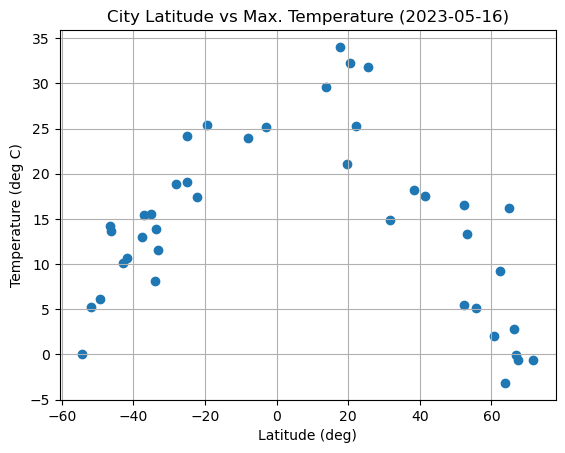

In [250]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max_Temp'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max. Temperature ({measurement_date})")
plt.ylabel("Temperature (deg C)")
plt.xlabel("Latitude (deg)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

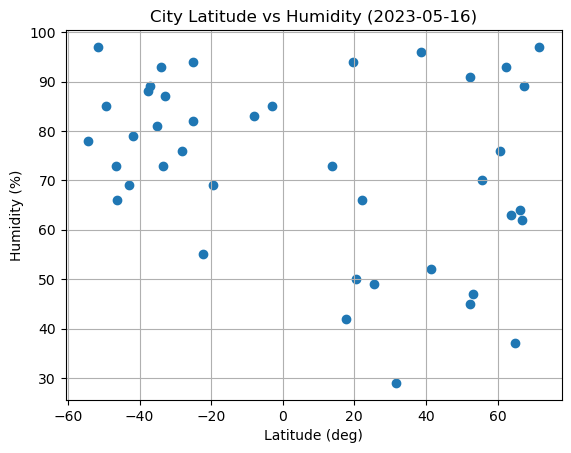

In [299]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({measurement_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (deg)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

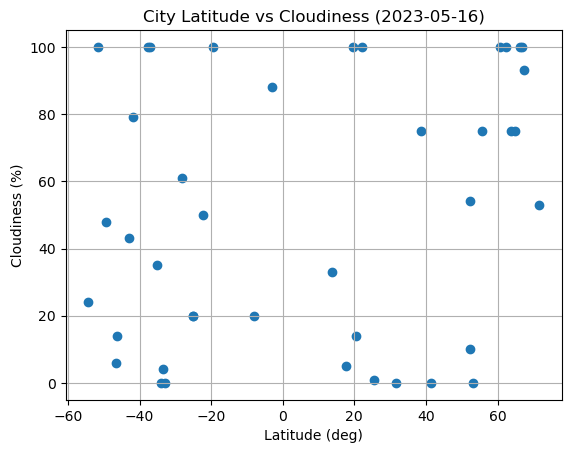

In [300]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({measurement_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (deg)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

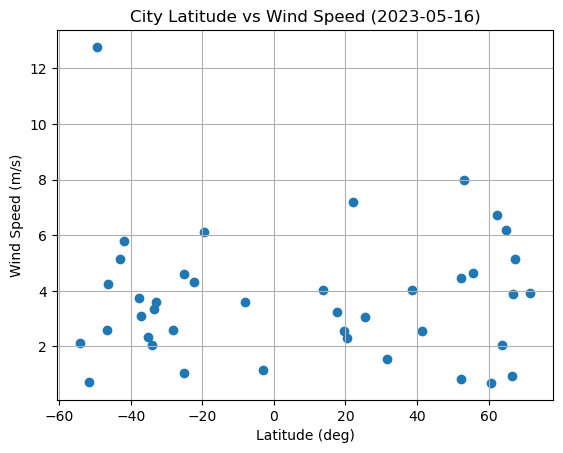

In [301]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind_Speed'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({measurement_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude (deg)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [406]:
# Define a function to create Linear Regression plots

def drawPlot(x_values, y_values, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + ", r="+ str(round(rvalue,2)) +", $r^{2}$=" + str(round(rvalue**2,3))
    print(line_eq)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    xmin, xmax, ymin, ymax = plt.axis()
    
    anno_x = xmin + (xmax-xmin)/10
    anno_y = ymin + (ymax-ymin)/10
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, xy=(anno_x, anno_y),fontsize=12,color="red")
    plt.show()
    

In [407]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0), :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
City_ID,,,,,,,,,,,,
1,ribeira grande,38.5167,-28.7000,18.21,96,75,4.02,PT,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
2,thompson,55.7435,-97.8558,5.09,70,75,4.63,CA,1684211618,1684211618,2023-05-16 04:33:38,2023-05-16
4,yenangyaung,20.4667,94.8833,32.27,50,14,2.31,MM,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16
5,tura,25.5198,90.2201,31.79,49,1,3.06,IN,1684211620,1684211620,2023-05-16 04:33:40,2023-05-16
7,tazovsky,67.4667,78.7000,-0.64,89,93,5.16,RU,1684211621,1684211621,2023-05-16 04:33:41,2023-05-16


In [408]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0), :])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,intDate,ISOdate,ISOdateOnly
City_ID,,,,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.42,89,100,3.10,SH,1684211295,1684211295,2023-05-16 04:28:15,2023-05-16
3,invercargill,-46.4000,168.3500,13.61,66,14,4.23,NZ,1684211619,1684211619,2023-05-16 04:33:39,2023-05-16
6,puerto natales,-51.7236,-72.4875,5.28,97,100,0.74,CL,1684211621,1684211621,2023-05-16 04:33:41,2023-05-16
11,port elizabeth,-33.9180,25.5701,8.16,93,0,2.06,ZA,1684211624,1684211624,2023-05-16 04:33:44,2023-05-16
12,imbituba,-28.2400,-48.6703,18.81,76,61,2.61,BR,1684211350,1684211350,2023-05-16 04:29:10,2023-05-16


###  Temperature vs. Latitude Linear Regression Plot

y = -0.55x + 39.08, r=-0.9, $r^{2}$=0.813Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



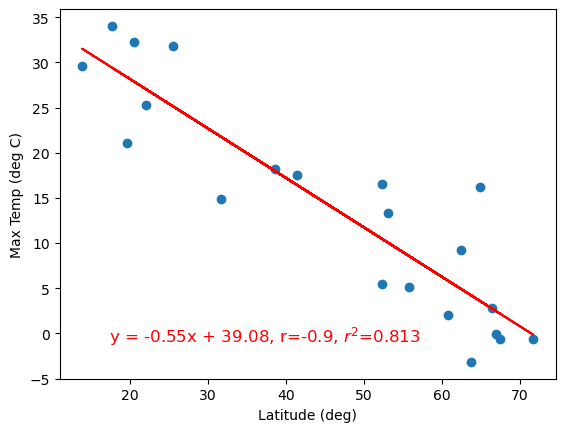

In [409]:
# Linear regression on Northern Hemisphere
drawPlot(northern_hemi_df['Lat'], northern_hemi_df['Max_Temp'], "Latitude (deg)", "Max Temp (deg C)")


y = 0.44x + 29.4, r=0.87, $r^{2}$=0.761Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



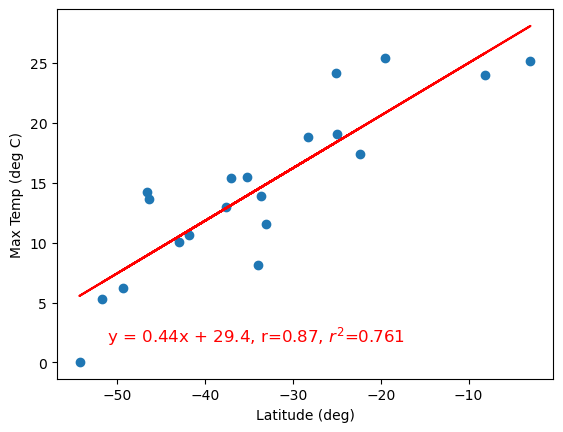

In [410]:
# Linear regression on Southern Hemisphere
drawPlot(southern_hemi_df['Lat'], southern_hemi_df['Max_Temp'], "Latitude (deg)", "Max Temp (deg C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.25x + 54.57, r=0.23, $r^{2}$=0.053
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


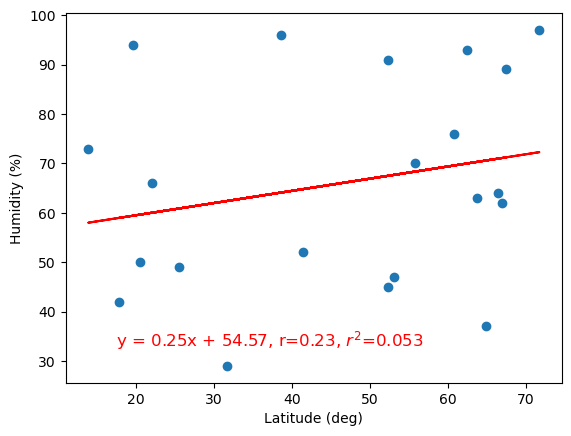

In [411]:
# Northern Hemisphere
drawPlot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude (deg)", "Humidity (%)")

y = -0.03x + 78.99, r=-0.04, $r^{2}$=0.002Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



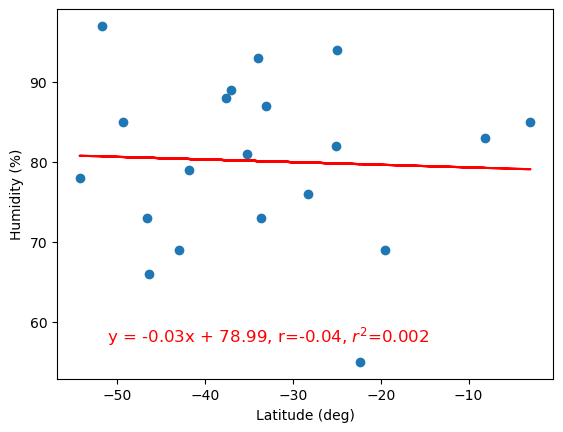

In [412]:
# Southern Hemisphere
drawPlot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude (deg)", "Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.92x + 13.01, r=0.44, $r^{2}$=0.195
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


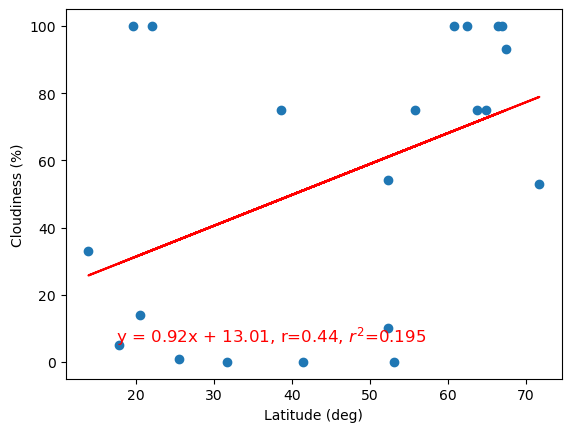

In [413]:
# Northern Hemisphere
drawPlot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude (deg)", "Cloudiness (%)")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
y = 0.22x + 53.0, r=0.08, $r^{2}$=0.007


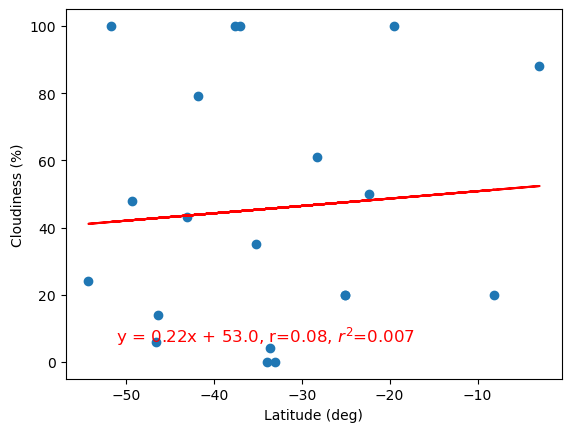

In [414]:
# Southern Hemisphere
drawPlot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude (deg)", "Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
y = 0.01x + 3.33, r=0.08, $r^{2}$=0.006


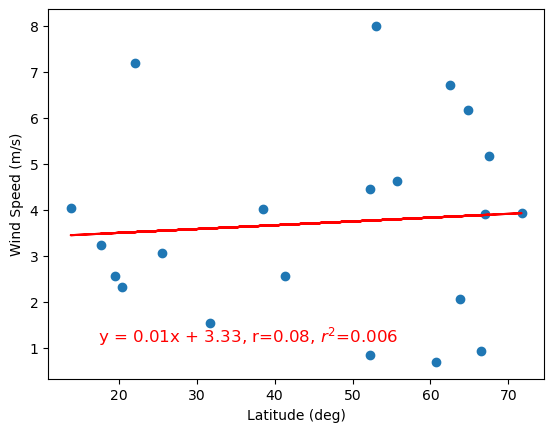

In [415]:
# Northern Hemisphere
drawPlot(northern_hemi_df['Lat'], northern_hemi_df['Wind_Speed'], "Latitude (deg)", "Wind Speed (m/s)")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
y = -0.04x + 2.48, r=-0.2, $r^{2}$=0.04


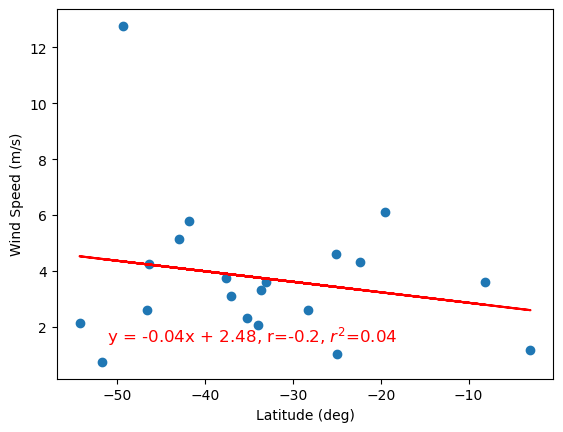

In [416]:
# Southern Hemisphere
drawPlot(southern_hemi_df['Lat'], southern_hemi_df['Wind_Speed'], "Latitude (deg)", "Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE